<a href="https://colab.research.google.com/github/LakshmiMedapati96/DM-Kaggle_Text_Classification/blob/main/Movie_Review_NBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries and Loading the dataset**

In [9]:
# The "encoding='latin-1'" in the below line of code were taken from Reference [1].

import pandas as pd
import re
from sklearn.model_selection import train_test_split
from collections import defaultdict
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("rt_reviews.csv", encoding='latin-1')
data.head()

Freshness                                             Review
0     fresh   Manakamana doesn't answer any questions, yet ...
1     fresh   Wilfully offensive and powered by a chest-thu...
2    rotten   It would be difficult to imagine material mor...
3    rotten   Despite the gusto its star brings to the role...
4    rotten   If there was a good idea at the core of this ...

**Data Cleaning**

In [10]:
# All the lines of code in this cell were taken from Reference [3].

# Define function for removing square brackets and special characters
def remove_square_brackets_special_characters(text):
    text = re.sub('\[[^]]*\]','', text)
    text = re.sub(r'[^a-zA-z0-9\s]','',text)
    return text

# Apply function on review column
data['Review'] = data['Review'].apply(remove_square_brackets_special_characters)

# data.head()
data.shape

(480000, 2)

**Dividing the dataset into Train, Development and Test sets (60:20:20)**

In [11]:
# All the lines of code in this cell were written by me by referring to Reference [2].

# Split the data into training and remaining datasets
trainset, remset = train_test_split(data, train_size = 0.6)

# Split the remaining dataset into development and test datasets
devset, testset = train_test_split(remset, train_size = 0.5)

trainset.shape, devset.shape, testset.shape

((288000, 2), (96000, 2), (96000, 2))

**Build vocabulary as dictionary**

In [12]:
# All the lines of code in this cell were written by me.

# Defining a function to build vocabulary as dictionary and 
# omitting rare words (if the occurrence is less than five times)
def build_vocab_dict(dataset, flag=False):
    vocab_dict = {}
    for review in dataset["Review"]:
        review = review.split(" ")
        # print(review)
        for word in review:
            word = word.lower()
            if word in vocab_dict:
                vocab_dict[word] += 1
            else:
                vocab_dict[word] = 1
    vocab_dict.pop('')                                     # for removing '' in the dictionary
    if flag:
        return vocab_dict
    total_vocab_dict = {k: v for k, v in vocab_dict.items() if v >= 5}
#print(str(total_word_dict)[:1000] + "...........")
    return total_vocab_dict

**Total words dictionary - Entire dataset and Training data**

In [13]:
# All the lines of code in this cell were written by me.

total_word_dict = build_vocab_dict(data)                        # dictionary for entire dataset

total_word_dict_train = build_vocab_dict(trainset)              # dictionary for training dataset
print(f"Total words in the dictionary (train set): {total_word_dict_train}")

Total words in the dictionary (train set): {'i': 15477, 'will': 11422, 'say': 3385, 'this': 49063, 'kingsman': 54, 'has': 19618, 'some': 11129, 'nerve': 130, 'however': 1330, 'misguided': 327, 'not': 26411, 'good': 11068, 'enough': 7926, 'to': 136504, 'pass': 458, 'for': 48518, 'a': 224892, 'litmus': 8, 'test': 326, 'of': 185790, 'the': 325718, 'generation': 516, 'gap': 94, 'and': 189041, 'bad': 5404, 'repulse': 8, 'any': 7330, 'its': 77733, 'fans': 2981, 'if': 16636, 'youre': 3101, 'looking': 1584, 'film': 42617, 'that': 74967, 'offers': 1892, 'pure': 841, 'escapism': 173, 'kong': 229, 'skull': 97, 'island': 301, 'should': 5264, 'definitely': 961, 'meet': 339, 'expectations': 696, 'despite': 3609, 'thorough': 72, 'attention': 1170, 'historical': 749, 'detail': 636, 'obvious': 1231, 'love': 5900, 'all': 20457, 'involved': 695, 'their': 9487, 'shattered': 32, 'subject': 1883, 'what': 13879, 'we': 7779, 'do': 5888, 'is': 114173, 'secret': 428, 'in': 85661, 'end': 4623, 'awfully': 244, 's

**Calculating prior probabilities**

In [14]:
# All the lines of code in this cell were written by me.

# Creating separate dataframes for fresh and rotten datasets
fresh_df = trainset[trainset["Freshness"] == 'fresh']
rotten_df = trainset[trainset["Freshness"] == 'rotten']
#print(fresh_df)
#print(rotten_df)

# Probabilities for fresh and rotten classes
prob_fresh = fresh_df.shape[0]  / (fresh_df.shape[0] + rotten_df.shape[0])
prob_rotten = rotten_df.shape[0]  / (fresh_df.shape[0] + rotten_df.shape[0])

print(f"P(rotten) = {str(prob_rotten)}")
print(f"P(fresh) = {str(prob_fresh)}")

P(rotten) = 0.4998402777777778
P(fresh) = 0.5001597222222223


**Creating separate word dictionaries for fresh and rotten classes**

In [15]:
# All the lines of code in this cell were written by me.

# fresh word dictionary
fresh_word_dict_train = build_vocab_dict(fresh_df)
print(f"Words dictionary for fresh label: {fresh_word_dict_train}")

# rotten word dictionary
rotten_word_dict_train = build_vocab_dict(rotten_df)
print(f"Words dictionary for rotten label: {rotten_word_dict_train}")

Words dictionary for fresh label: {'if': 8096, 'youre': 1540, 'looking': 753, 'for': 23998, 'a': 118347, 'film': 23500, 'that': 37356, 'offers': 1121, 'pure': 576, 'escapism': 123, 'kong': 155, 'skull': 59, 'island': 152, 'should': 2239, 'definitely': 607, 'meet': 145, 'expectations': 441, 'skillful': 79, 'blend': 301, 'of': 99262, 'oldfashioned': 486, 'disney': 480, 'storytelling': 812, 'and': 106777, 'newfangled': 16, 'computer': 127, 'animation': 936, 'makes': 4030, 'an': 20752, 'effective': 921, 'frequently': 336, 'spectacular': 504, 'summer': 1053, 'family': 2135, 'no': 4250, 'one': 12194, 'can': 5329, 'be': 14189, 'in': 44972, 'any': 2749, 'doubt': 390, 'bane': 5, 'is': 60116, 'the': 163984, 'most': 7513, 'menacing': 60, 'comic': 1232, 'book': 842, 'baddie': 7, 'ever': 2301, 'despite': 1544, 'many': 2755, 'winding': 43, 'roads': 26, 'it': 35955, 'goes': 1010, 'down': 1595, 'ashby': 8, 'funny': 3873, 'throughout': 593, 'easy': 1051, 'to': 63297, 'watch': 1754, 'without': 2307, 'cg

**Calculating probability of the occurrence**

In [16]:
# All the lines of code in this cell were written by me.

# Calculating probability of all the words
total_num_of_words_train = sum(list(total_word_dict_train.values()))

for key, value in total_word_dict_train.items():
    total_word_dict_train[key] = (value, value*100/total_num_of_words_train)
print(f"Probability of the occurrence: {str(total_word_dict_train)}")

Probability of the occurrence: {'i': (15477, 0.25433245986831965), 'will': (11422, 0.1876969281266361), 'say': (3385, 0.05562546854392079), 'this': (49063, 0.8062488517490061), 'kingsman': (54, 0.0008873782278793862), 'has': (19618, 0.32238122360255184), 'some': (11129, 0.18288207959388314), 'nerve': (130, 0.0021362809189688927), 'however': (1330, 0.021855797094066366), 'misguided': (327, 0.005373568157714061), 'not': (26411, 0.43401011808374945), 'good': (11068, 0.18187967085498236), 'enough': (7926, 0.1302474043365188), 'to': (136504, 2.243160696637921), 'pass': (458, 0.007526282006828869), 'for': (48518, 0.7972929048194827), 'a': (224892, 3.695634526375017), 'litmus': (8, 0.00013146344116731648), 'test': (326, 0.0053571352275681465), 'of': (185790, 3.053074091809466), 'the': (325718, 5.352501141266998), 'generation': (516, 0.008479391955291913), 'gap': (94, 0.0015446954337159685), 'and': (189041, 3.1064975477138344), 'bad': (5404, 0.08880355450852229), 'repulse': (8, 0.0001314634411

**Calculating conditional probability based on the sentiment**

In [17]:
# All the lines of code in this cell were written by me.

# Calculating probability of each word in fresh.
fresh_total_num_of_words = sum(list(fresh_word_dict_train.values()))
fresh_word_prob_dict_train = {}
for key, value in fresh_word_dict_train.items():
    fresh_word_prob_dict_train[key] = value*100/fresh_total_num_of_words
print(f"Conditional probability based on 'fresh' label: {str(fresh_word_prob_dict_train)}")

# Calculating probability of each word in rotten.
rotten_total_num_of_words = sum(list(rotten_word_dict_train.values()))
rotten_word_prob_dict_train = {}
for key, value in rotten_word_dict_train.items():
    rotten_word_prob_dict_train[key] = value*100/rotten_total_num_of_words
print(f"Conditional probability based on 'rotten' label: {str(rotten_word_prob_dict_train)}")

Conditional probability based on 'fresh' label: {'if': 0.2655180997352362, 'youre': 0.05050616027572428, 'looking': 0.024695544602350898, 'for': 0.7870433988940463, 'a': 3.881332824773468, 'film': 0.770710887324364, 'that': 1.2251351449739976, 'offers': 0.03676454913577073, 'pure': 0.01889061579143973, 'escapism': 0.004033933580463693, 'kong': 0.005083412235543677, 'skull': 0.0019349762703037225, 'island': 0.004985023611629929, 'should': 0.0734307096476277, 'definitely': 0.019907298238548466, 'meet': 0.004755450155831182, 'expectations': 0.014463127715321043, 'skillful': 0.002590900429728713, 'blend': 0.00987165859934611, 'of': 3.255417195642171, 'oldfashioned': 0.015938957074027274, 'disney': 0.015742179826199774, 'storytelling': 0.02663052087265462, 'and': 3.5018806985461115, 'newfangled': 0.0005247393275399925, 'computer': 0.0041651184123486906, 'animation': 0.030697250661089564, 'makes': 0.1321687181241356, 'an': 0.6805869078193703, 'effective': 0.03020530754152082, 'frequently': 0

**Calculating accuracy on Development dataset**

In [18]:
# All the lines of code in this cell were taken from Reference [4].

# Defining a function to calculate accuracy score
def accuracyscore(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == "rotten":
            value = 0
        else:
            value = 1
        if value == predicted[i]:
            correct = correct + 1
            
        # print(actual[i] , predicted[i])
    #print(f"correct = {correct}")
    #print(str(rotten_word_prob_dict_train)[:200])
    return correct * 100.0/ float(len(actual))

In [19]:
# All the lines of code in this cell were taken from Reference [4].

# Defining a function to predict the class label
def predict(preddata):
    pred = []
    for review in preddata["Review"]:
        vocab_dict = {}
        review = review.split(" ")
        # print(review)
        for word in review:
            word = word.lower()
            if word in vocab_dict:
                vocab_dict[word] += 1
            else:
                vocab_dict[word] = 1
        vocab_dict.pop('', None)                                     # for removing '' in the dictionary
        likelihood_rotten = 1.0
        likelihood_fresh = 1.0
        
        for word in vocab_dict:
            if not word in rotten_word_prob_dict_train:
                rotten_word_prob_dict_train[word] = 0.0

            if not word in fresh_word_prob_dict_train:
                fresh_word_prob_dict_train[word] = 0.0

            likelihood_rotten = likelihood_rotten * rotten_word_prob_dict_train[word]
            likelihood_fresh = likelihood_fresh * fresh_word_prob_dict_train[word]
        
        posterior_rotten = prob_rotten * likelihood_rotten
        posterior_fresh = prob_fresh * likelihood_fresh

        if posterior_rotten > posterior_fresh:
            y_pred = 0
        else:
            y_pred = 1

        pred.append(y_pred)
    return pred

In [20]:
# All the lines of code in this cell were taken from Reference [4].

dev_pred = predict(devset)

accuracy = accuracyscore(devset['Freshness'].to_list(),dev_pred)
print(f"Accuracy on development set before smoothing : {accuracy}%")

Accuracy on development set before smoothing : 67.26666666666667%


**Applying laplace smoothing**

In [21]:
# All the lines of code in this cell were written by referring to Reference [4].

# Defining afunction to apply smoothing technique
def laplace_smoothing(word_freq_0, word_freq_1, alpha, vocab_dict):
    word_freq_0_probs = {}
    word_freq_1_probs = {}

    vocab_len = len(vocab_dict)
    for word in vocab_dict:
        word_freq_0_probs[word] = (word_freq_0.get(word, 0) + 1) / (len(word_freq_0) + vocab_len * alpha)
        word_freq_1_probs[word] = (word_freq_1.get(word, 0) + 1) / (len(word_freq_1) + vocab_len * alpha)

    return word_freq_0_probs, word_freq_1_probs

In [24]:
# All the lines of code in this cell were taken from Reference [4].

# Defining a function to predict the class label with laplace smoothing
def predict_alpha(preddata, alpha, rotten_word_prob_dict_train, fresh_word_prob_dict_train):
    import time
    #print("Alpha prediction started.")
    pred = []
    i = 0
    #print("Iter length : ", len(preddata))
    for review in preddata["Review"]:
        # s_t = time.time()
        i = i+1
        #print(f"Iter value: {i}")
        vocab_dict = {}
        review = review.split(" ")
        # print(review)
        # Create a defaultdict with int as the default factory
        vocab_dict = defaultdict(int)
        import time
        # s_t_2 = time.time()
        for word in review:
            word = word.lower()
            vocab_dict[word] += 1
        vocab_dict.pop('', None)                                    # for removing '' in the dictionary
        # a1_t = time.time()- s_t_2
        # print(f"time taken for word_review: {a1_t}sec")
        likelihood_rotten = 1.0
        likelihood_fresh = 1.0
        # s_t_3 = time.time()
        for word in vocab_dict:
            if not word in rotten_word_prob_dict_train:
                rotten_word_prob_dict_train[word] = 0.0

            if not word in fresh_word_prob_dict_train:
                fresh_word_prob_dict_train[word] = 0.0
            modified_rotten, modified_fresh = laplace_smoothing(rotten_word_prob_dict_train,
                                                  fresh_word_prob_dict_train, alpha, vocab_dict)
            likelihood_rotten = likelihood_rotten * modified_rotten[word]
            likelihood_fresh = likelihood_fresh * modified_fresh[word]
        # a_t = time.time()- s_t_3
        # print(f"total time taken for word_vocabdict: {a_t}sec")
        posterior_rotten = prob_rotten * likelihood_rotten
        posterior_fresh = prob_fresh * likelihood_fresh

        if posterior_rotten > posterior_fresh:
            y_pred = 0
        else:
            y_pred = 1

        pred.append(y_pred)
        # print("appended.")
        # a_t = time.time()- s_t
        # print(f"total time taken for iter: {a_t}sec")
    return pred

**Determining the best value for alpha**

In [25]:
# All the lines of code in this cell were taken from Reference [4].

alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
lap_acc = []
# print(str(rotten_word_prob_dict_train)[:200])
for alpha in alpha_values:
  # print("alpha value:", alpha)
  alpha_preds = predict_alpha(devset, alpha, rotten_word_prob_dict_train, fresh_word_prob_dict_train)
  # print("Alpha prediction ended.")
  alpha_accuracy = accuracyscore (devset["Freshness"].to_list(), alpha_preds)
  print(f'alpha = {alpha}, Accuracy = {alpha_accuracy} %')
  lap_acc.append(alpha_accuracy)

alpha = 0.0001, Accuracy = 61.358333333333334 %
alpha = 0.001, Accuracy = 61.358333333333334 %
alpha = 0.01, Accuracy = 61.358333333333334 %
alpha = 0.1, Accuracy = 61.358333333333334 %
alpha = 1, Accuracy = 61.358333333333334 %
alpha = 10, Accuracy = 61.3625 %
alpha = 100, Accuracy = 61.37291666666667 %
alpha = 1000, Accuracy = 61.41458333333333 %
alpha = 10000, Accuracy = 61.58958333333333 %


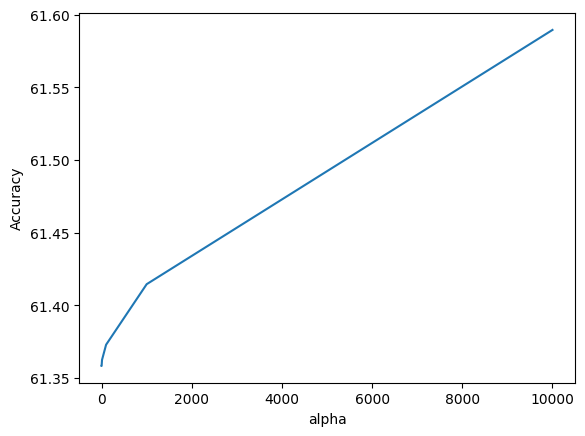

In [26]:
# All the lines of code in this cell were taken from Reference [4].

plt.plot(alpha_values, lap_acc)
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.show()

**Deriving the Top 10 words that predicts each class**

In [27]:
# All the lines of code in this cell were written by me.

# Top 10 words - fresh
sorted_fresh_train = sorted(fresh_word_dict_train.items(), key=lambda x: x[1], reverse=True)
print(f"Top 10 words that predicts 'fresh' class : {dict(sorted_fresh_train[:10])}")

# Top 10 words - rotten
sorted_rotten_train = sorted(rotten_word_dict_train.items(), key=lambda x: x[1], reverse=True)
print(f"Top 10 words that predicts 'rotten' class : {dict(sorted_rotten_train[:10])}")

Top 10 words that predicts 'fresh' class : {'the': 163984, 'a': 118347, 'and': 106777, 'of': 99262, 'to': 63297, 'is': 60116, 'in': 44972, 'its': 39593, 'that': 37356, 'it': 35955}
Top 10 words that predicts 'rotten' class : {'the': 161734, 'a': 106545, 'of': 86528, 'and': 82264, 'to': 73207, 'is': 54057, 'in': 40689, 'it': 38318, 'its': 38140, 'that': 37611}


**Calculating final accuracy on test dataset with optimal hyperparameter (alpha)**

In [28]:
# All the lines of code in this cell were taken from Reference [4].

alpha = 10000
test_pred = predict_alpha(testset, alpha, rotten_word_prob_dict_train, fresh_word_prob_dict_train)

lap_test_accuracy = accuracyscore(testset["Freshness"].to_list(), test_pred)
print(f'Final Accuracy on Test Dataset after applying Laplace smoothing : {lap_test_accuracy} %')

Final Accuracy on Test Dataset after applying Laplace smoothing : 61.76979166666667 %
